In [1]:
import numpy as np
import h5py
import glob
import sys
import os
import time

from tqdm import tqdm

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistic
import scipy.stats
import scipy.optimize
import tikzplotlib

In [2]:
if not os.path.isfile("output/tilting/data_.pkl"):
    df = pd.read_pickle("output/tilting/data.pkl")

In [3]:
if not os.path.isfile("output/tilting/data_.pkl"):    
    df_analyse = pd.DataFrame()
    for i in tqdm(range(df.shape[0])):

#         if df['psi'].iloc[i] != 0.8:
#             continue

        dirc = statistic._remap_direction_sym(np.array(df['direction_ref'].iloc[i]) - np.array(df['direction'].iloc[i]))
                        
        df_analyse = df_analyse.append(
            {
                "voxel_size":
                    df['voxel_size'].iloc[i],
                "resolution":
                    df['resolution'].iloc[i],
                "model":
                    df['model'].iloc[i],
                "omega":
                    df['omega'].iloc[i],
                "psi":
                    df['psi'].iloc[i],
                'f0':
                    df['f0'].iloc[i],
                'f1':
                    df['f1'].iloc[i],
                'tilt':
                    float(df['tilt'].iloc[i]),
                "transmittance":
                    df['transmittance'].iloc[i],
                "direction":
                    df['direction'].iloc[i],
                "retardation":
                    df['retardation'].iloc[i],
                "diff_trans": (np.array(df['transmittance_ref'].iloc[i]) -
                            np.array(df['transmittance'].iloc[i])).tolist(),
                "diff_dir": (np.rad2deg(dirc)).tolist(),
                "diff_ret": (np.array(df['retardation_ref'].iloc[i]) -
                            np.array(df['retardation'].iloc[i])).tolist(),
            },
            ignore_index=True)

    df_analyse.to_pickle("output/tilting/data_.pkl")

In [4]:
df_analyse = pd.read_pickle(
    "output/tilting/data_.pkl")

In [6]:
print(df_analyse.voxel_size.unique())

[0.1  0.25 0.75 1.25]


In [7]:
# df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]},
#                   index=['a', 'b', 'c'])
# df_analyse.to_hdf('output/tilting/data_.h5', key='df', mode='w')

In [8]:
# print(df_)

In [10]:
# df_.to_hdf('output/tilting/data_.h5', key='df', mode='w')

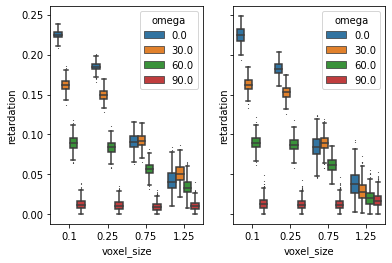

In [11]:
for mod in ['retardation']:
    fig, axs = plt.subplots(1,2, sharey=True)
    # axs.plot(np.NaN, np.NaN, '-', color='none', label='$\Omega$')
    for i, m in enumerate(['p', 'r']):
        sns.boxplot(
            x='voxel_size',
            y=mod,
            hue='omega',
            fliersize=0.25,
            data=df_analyse[(df_analyse.model == m) & 
                            (df_analyse.f0 == 0) & 
                            (df_analyse.f1 == 0) & 
                            (df_analyse.psi == 0.5) &
                            (df_analyse.tilt == "0") & 
                            (df_analyse.resolution == 2.5)].explode(mod), ax=axs[i]
        )
#     axs.legend(title = None)
#     axs.legend(title = "$\Omega$")
#     axs.set_xlabel('voxel_size')
#     axs.set_ylabel('$\Delta \\varphi$')
#     legend = ax.legend()
#     print(dir(legend))
#     print(legend.get_label)
#     ax.legend(title='$\Omega$')
#     tikzplotlib.save(f"voxel_size_vs_{mod}.tex")


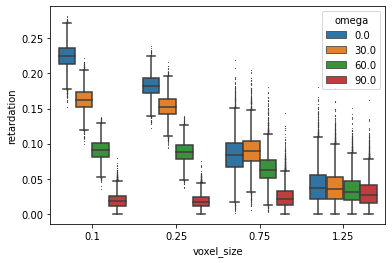

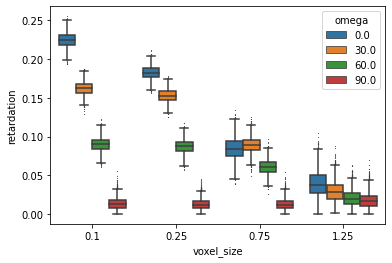

In [12]:
fig, axs = plt.subplots(1,1)
sns.boxplot(
    x='voxel_size',
    y=mod,
    hue='omega',
    fliersize=0.25,
    data=df_analyse[(df_analyse.model == 'r') & (df_analyse.f0 == 0) & (df_analyse.f1 == 0) & (df_analyse.psi == 0.5) & (df_analyse.resolution == 1.25)].explode(mod)
)
fig, axs = plt.subplots(1,1)
sns.boxplot(
    x='voxel_size',
    y=mod,
    hue='omega',
    fliersize=0.25,
    data=df_analyse[(df_analyse.model == 'r') & (df_analyse.f0 == 0) & (df_analyse.f1 == 0) & (df_analyse.psi == 0.5) & (df_analyse.resolution == 2.5)].explode(mod)
)